# Eksploratiivista data-analyysia Ropecon 2023 datalla

## Importit

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from read_data import read_data, get_all_usernames
from datetime import datetime, timedelta
import locale

from scipy import stats

locale.setlocale(locale.LC_ALL,'fi_FI')
%matplotlib widget

In [6]:
sns.set_theme('paper')
sns.set(font_scale=1.5)

## Ladataan data

Tässä käytetään omaa [read_data.py](read_data.py) moduulia

In [7]:
signedGames = read_data('users')
userSignups = read_data('signups')
results = read_data('results')
games = read_data('games')
usernames = get_all_usernames()

## Katsotaan miltä data näyttää

In [8]:
signedGames.head()

,priority,time,message,gameDetails.gameId,username,userGroup,serial,groupCode,createdAt,updatedAt
0,1,2023-07-28T15:00:00Z,,p6456,422298,user,2243274137,0,2023-07-28T09:29:01.455Z,2023-07-30T08:00:55.183Z
1,1,2023-07-28T17:00:00Z,,p6742,422298,user,2243274137,0,2023-07-28T09:29:01.455Z,2023-07-30T08:00:55.183Z
2,2,2023-07-28T17:00:00Z,,p6623,422298,user,2243274137,0,2023-07-28T09:29:01.455Z,2023-07-30T08:00:55.183Z
3,1,2023-07-29T09:00:00Z,,p6759,422298,user,2243274137,0,2023-07-28T09:29:01.455Z,2023-07-30T08:00:55.183Z
4,1,2023-07-29T11:00:00Z,,p6631,422298,user,2243274137,0,2023-07-28T09:29:01.455Z,2023-07-30T08:00:55.183Z


In [9]:
userSignups.head()

,username,priority,time,message,game.gameId,count,createdAt,updatedAt
0,319070,0,2023-07-28T13:00:00Z,,p6949,5,2023-07-27T17:45:57.684Z,2023-07-28T12:38:56.786Z
1,561575,0,2023-07-28T13:00:00Z,,p6949,5,2023-07-27T17:45:57.684Z,2023-07-28T12:38:56.786Z
2,512269,0,2023-07-28T13:00:00Z,,p6949,5,2023-07-27T17:45:57.684Z,2023-07-28T12:38:56.786Z
3,262918,0,2023-07-28T13:00:00Z,,p6949,5,2023-07-27T17:45:57.684Z,2023-07-28T12:38:56.786Z
4,902178,0,2023-07-28T13:00:00Z,,p6949,5,2023-07-27T17:45:57.684Z,2023-07-28T12:38:56.786Z


In [10]:
results.head()

,username,enteredGame.gameDetails.gameId,enteredGame.priority,enteredGame.time,startTime,algorithm,message,updatedAt,createdAt
0,570145,p6301,2,2023-07-28T15:00:00Z,2023-07-28T15:00:00Z,random,"Random Assign Result - Players: 38/44 (86%), G...",2023-07-28T13:00:43.903Z,2023-07-28T13:00:43.903Z
1,4344,p6301,1,2023-07-28T15:00:00Z,2023-07-28T15:00:00Z,random,"Random Assign Result - Players: 38/44 (86%), G...",2023-07-28T13:00:43.903Z,2023-07-28T13:00:43.903Z
2,405213,p6727,1,2023-07-28T15:00:00Z,2023-07-28T15:00:00Z,random,"Random Assign Result - Players: 38/44 (86%), G...",2023-07-28T13:00:43.903Z,2023-07-28T13:00:43.903Z
3,675486,p6456,1,2023-07-28T15:00:00Z,2023-07-28T15:00:00Z,random,"Random Assign Result - Players: 38/44 (86%), G...",2023-07-28T13:00:43.903Z,2023-07-28T13:00:43.903Z
4,974994,p6793,1,2023-07-28T15:00:00Z,2023-07-28T15:00:00Z,random,"Random Assign Result - Players: 38/44 (86%), G...",2023-07-28T13:00:43.903Z,2023-07-28T13:00:43.903Z


In [11]:
games.head()

,gameId,accessibilityValues,contentWarnings,createdAt,description,endTime,entryFee,gameSystem,genres,language,...,popularity,programType,revolvingDoor,shortDescription,signupType,startTime,styles,tags,title,updatedAt
0,p7213,[],,2023-07-27T17:45:57.271Z,Kiinnostaako päästä kokeilemaan takomista koru...,2023-07-28T16:00:00Z,30 - 40 €,,[],finnish,...,0,workshop,True,,none,2023-07-28T12:00:00Z,[],[],Tao oma korusi,2023-07-30T16:25:23.482Z
1,p6949,[],,2023-07-27T17:45:57.271Z,Kuljet kohti risteystä. Menneisyytesi elämä pä...,2023-07-28T16:00:00Z,,Wanderhome,[],finnishOrEnglish,...,0,experiencePoint,False,,konsti,2023-07-28T13:00:00Z,[],"[suitableForAllAges, beginnerFriendly, ropecon...",Wanderhome - Tulevan ja menneen tienristeykses...,2023-07-30T16:25:23.482Z
2,p6114,[participationRequiresReactQuickly],"Hyötyeläimiin kohdistuva väkivalta, kauan aika...",2023-07-27T17:45:57.271Z,Legendoja ja lohikäärmeitä Roudan maassa. Suke...,2023-07-28T15:00:00Z,,Legendoja & Lohikäärmeitä,[],finnish,...,0,tabletopRPG,False,Fantasiaseikkailua Kalevalan hengessä,none,2023-07-28T13:00:00Z,[light],[beginnerFriendly],Keskiyön nauriit,2023-07-30T16:25:23.482Z
3,p6338,[],,2023-07-27T17:45:57.271Z,Bersrkin Pesä: Ajan pyörteissä on koko Ropecon...,2023-07-30T11:00:00Z,,Dungeons & Dragons,[],finnishOrEnglish,...,0,tabletopRPG,True,Koko Ropeconin ajan pelattava D&D-maraton,none,2023-07-28T13:00:00Z,"[light, rulesLight, storyDriven]","[suitableForAllAges, beginnerFriendly, ropecon...",Berserkin Pesä: Ajan pyörteissä,2023-07-30T16:25:23.482Z
4,p6389,"[recording, programmeDurationOver2Hours, longT...",,2023-07-27T17:45:57.271Z,Hullu Reppuli on tehnyt sen taas. Hän on koonu...,2023-07-28T19:00:00Z,,The One Ring 2e,[],finnish,...,0,tabletopRPG,True,Tule seikaliemaan joukon Hobbiteja kanssa kont...,none,2023-07-28T13:00:00Z,"[light, rulesLight, storyDriven]","[suitableForAllAges, beginnerFriendly]",Seikkailuja Konnussa,2023-07-30T16:25:23.482Z


## Luodaan uudet dataframet, jotka sisältävät ainoastaan pöytäropet

pyötäropejen id:t löytyvät games-dataframesta programType-sarakkeesta

In [12]:
ttrpg = games[games.programType=='tabletopRPG'].gameId.to_list()
signups_ttrpg = userSignups[userSignups['game.gameId'].isin(ttrpg)]
signedGames_ttrpg = signedGames[signedGames['gameDetails.gameId'].isin(ttrpg)]
games_ttrpg = games[games.programType == 'tabletopRPG']

### Lisätään kaikkiin uusiin pöytärope-dataframeihin datetime-sarake, joka sisältää ajan, jolloin peli alkoi

Konsti tallentaa alkamisajan vyöhykkeellä GMT, joten lisätään kaksi tuntia Konstin alkamisaikaan

In [13]:
signups_ttrpg = signups_ttrpg.assign(datetime=lambda x: [datetime.strptime(d, r'%Y-%m-%dT%H:%M:%SZ')+timedelta(hours=2) for d in signups_ttrpg.time])

In [14]:
signedGames_ttrpg = signedGames_ttrpg.assign(datetime=lambda x: [datetime.strptime(d, r'%Y-%m-%dT%H:%M:%SZ')+timedelta(hours=2) for d in signedGames_ttrpg.time])

In [15]:
results = results.assign(datetime=lambda x: [datetime.strptime(d, r'%Y-%m-%dT%H:%M:%SZ')+timedelta(hours=2) for d in results.startTime])

In [16]:
games_ttrpg = games_ttrpg.assign(datetime=lambda x: [datetime.strptime(d, r'%Y-%m-%dT%H:%M:%SZ')+timedelta(hours=2) for d in games_ttrpg.startTime])

## Kuinka monta pelaajaa ei päässyt yhteenkään peliin

In [17]:
# Etistään ne pelaajat, jotka eivät ole olleet yhdessäkään ropessa, mutta ovat yrittäneet päästä vähintään yhteen peliin
users_with_signups = signups_ttrpg.username.unique()
users_atleast_one_signedGame = signedGames_ttrpg.username.unique()
users_no_games_atleast_one_signedGame = set(users_atleast_one_signedGame).difference(set(users_with_signups))

In [18]:
print(f"{np.round(len(users_no_games_atleast_one_signedGame)/len(usernames)*100,1)}% ({len(users_no_games_atleast_one_signedGame)}) yritti päästä pöytäropeen, mutta ei päässyt")

11.8% (235) yritti päästä pöytäropeen, mutta ei päässyt


## Kuinka moni pelaaja ei käyttänyt arvontaa, mutta pääsi peliin

In [19]:
users_with_no_signedGames_and_atleast_one_signup = set(users_with_signups).difference(set(users_atleast_one_signedGame))
print(f"{np.round(len(users_with_no_signedGames_and_atleast_one_signup)/len(usernames)*100,1)}% ({len(users_with_no_signedGames_and_atleast_one_signup)}) pääsi peliin käyttämättä arvontaa")

5.7% (113) pääsi peliin käyttämättä arvontaa


## Kuinka moneen peliin ne käyttäjät, jotka eivät päässeet yhteenkään peliin, yrittivät päästä arvonnassa

In [20]:
num_signedGames = signedGames_ttrpg.query('username in @users_no_games_atleast_one_signedGame').groupby(by='username').count().loc[:, 'gameDetails.gameId']

In [21]:
print(f"Keskimäärin käyttäjät jotka eivät päässeet yhteenkään peliin yrittivät päästä {np.round(num_signedGames.mean(),1)} peliin arvontavaiheessa")

Keskimäärin käyttäjät jotka eivät päässeet yhteenkään peliin yrittivät päästä 2.6 peliin arvontavaiheessa


### Ketkä olivat "epäonnisimmat pelaajat" (yrittivät päästä suurimpaan määrään pelejä arvonnassa, mutta eivät päässet sinne)

In [22]:
print(f"{len(num_signedGames[num_signedGames==num_signedGames.max()])} käyttäjää yrittivät päästä {int(num_signedGames.max())} pöytäropeen arvontavaiheessa, mutta eivät päässeet pelaamaan kertaakaan")

3 käyttäjää yrittivät päästä 14 pöytäropeen arvontavaiheessa, mutta eivät päässeet pelaamaan kertaakaan


### Mikä oli täyttöaste peleissa johon pelaajat, joilla oli 11 osallistusmista mutta eivät päässeet kertaakaan pelaamaan, osallistuivat

In [23]:
users_no_games_and_signedGames = list(users_no_games_atleast_one_signedGame)

In [24]:
signedGames_slots = signedGames_ttrpg.groupby(by=["username","datetime"]).count()

In [25]:
unlucky_users = num_signedGames[num_signedGames==num_signedGames.max()].index

In [26]:
signedGames_slots[signedGames_slots.index.get_level_values(0).isin(unlucky_users)]

priority  time  message  gameDetails.gameId  \
username datetime                                                           
252397   2023-07-28 20:00:00         1     1        1                   1   
         2023-07-29 11:00:00         1     1        1                   1   
         2023-07-29 12:00:00         2     2        2                   2   
         2023-07-29 13:00:00         3     3        3                   3   
         2023-07-29 14:00:00         1     1        1                   1   
         2023-07-29 15:00:00         3     3        3                   3   
         2023-07-29 16:00:00         3     3        3                   3   
449462   2023-07-28 20:00:00         1     1        1                   1   
         2023-07-29 11:00:00         2     2        2                   2   
         2023-07-29 12:00:00         1     1        1                   1   
         2023-07-29 13:00:00         3     3        3                   3   
         2023-07-29 14:00:00         1     1        1                   1   
         2023-07-29 15:00:00         3     3        3                   3   
         2023-07-29 16:00:00         3     3        3                   3   
621379   2023-07-28 20:00:00         1     1        1                   1   
         2023-07-29 11:00:00         2     2        2                   2   
         2023-07-29 12:00:00         1     1        1                   1   
         2023-07-29 13:00:00         3     3        3                   3   
         2023-07-29 14:00:00         1     1        1                   1   
         2023-07-29 15:00:00         3     3        3                   3   
         2023-07-29 16:00:00         3     3        3                   3   

                              userGroup  serial  groupCode  createdAt  \
username datetime                                                       
252397   2023-07-28 20:00:00          1       1          1          1   
         2023-07-29 11:00:00          1       1          1          1   
         2023-07-29 12:00:00          2       2          2          2   
         2023-07-29 13:00:00          3       3          3          3   
         2023-07-29 14:00:00          1       1          1          1   
         2023-07-29 15:00:00          3       3          3          3   
         2023-07-29 16:00:00          3       3          3          3   
449462   2023-07-28 20:00:00          1       1          1          1   
         2023-07-29 11:00:00          2       2          2          2   
         2023-07-29 12:00:00          1       1          1          1   
         2023-07-29 13:00:00          3       3          3          3   
         2023-07-29 14:00:00          1       1          1          1   
         2023-07-29 15:00:00          3       3          3          3   
         2023-07-29 16:00:00          3       3          3          3   
621379   2023-07-28 20:00:00          1       1          1          1   
         2023-07-29 11:00:00          2       2          2          2   
         2023-07-29 12:00:00          1       1          1          1   
         2023-07-29 13:00:00          3       3          3          3   
         2023-07-29 14:00:00          1       1          1          1   
         2023-07-29 15:00:00          3       3          3          3   
         2023-07-29 16:00:00          3       3          3          3   

                              updatedAt  
username datetime                        
252397   2023-07-28 20:00:00          1  
         2023-07-29 11:00:00          1  
         2023-07-29 12:00:00          2  
         2023-07-29 13:00:00          3  
         2023-07-29 14:00:00          1  
         2023-07-29 15:00:00          3  
         2023-07-29 16:00:00          3  
449462   2023-07-28 20:00:00          1  
         2023-07-29 11:00:00          2  
         2023-07-29 12:00:00          1  
         2023-07-29 13:00:00          3  
         2023-07-29 14:00:00    

In [27]:
signedGames_games = signedGames_ttrpg.groupby(by=['username','gameDetails.gameId']).count()

In [28]:
games_unlucky_users = signedGames_games[signedGames_games.index.get_level_values(0).isin(unlucky_users)]

In [29]:
games_unlucky_users_tried_to_sign = list(games_unlucky_users.index.get_level_values(1).unique())

In [30]:
signedGames_gameCounts = signedGames_ttrpg.groupby(by=['gameDetails.gameId']).count()

In [31]:
maxAttendances =  games[games.gameId.isin(list(signedGames_gameCounts.index))].loc[:, ['gameId','maxAttendance']].sort_values(by='gameId')

In [32]:
signedGames_gameCounts = signedGames_gameCounts.assign(maxAttendance = maxAttendances.loc[:, 'maxAttendance'].to_numpy())

In [33]:
signedGames_gameCounts = signedGames_gameCounts.assign(fillPercent = lambda x: x['username']/x['maxAttendance'])

In [34]:
(signedGames_gameCounts.loc[:, 'fillPercent'].median(), signedGames_gameCounts.loc[:, 'fillPercent'].std())

(4.4, 3.013874364877919)

In [35]:
signedGames_gameCounts_unlucky_users = signedGames_gameCounts[signedGames_gameCounts.index.get_level_values(0).isin(games_unlucky_users_tried_to_sign)]

In [36]:
fillPercents = signedGames_gameCounts.loc[:, 'fillPercent'].to_numpy()

In [37]:
(signedGames_gameCounts_unlucky_users.loc[:, 'fillPercent'].mean(),signedGames_gameCounts_unlucky_users.loc[:, 'fillPercent'].std())

(7.121875, 2.753830455188904)

In [38]:
(signedGames_gameCounts_unlucky_users.loc[:, 'fillPercent'].min(), signedGames_gameCounts_unlucky_users.loc[:, 'fillPercent'].max())

(3.1666666666666665, 12.0)

In [39]:
fillPercents_unlucky_users = signedGames_gameCounts_unlucky_users.loc[:, 'fillPercent'].to_numpy()

### Mikä täyttöaste on peleissa johon pelaajat, joilla oli 5 yritystä mutta eivät päässeet kertaakaan pelaamaan, osallistuivat

In [40]:
signedGames_slots = signedGames_ttrpg.groupby(by=["username","datetime"]).count()

In [41]:
unlucky_users = num_signedGames[num_signedGames>=5].index

In [42]:
games_unlucky_users = signedGames_games[signedGames_games.index.get_level_values(0).isin(unlucky_users)]

In [43]:
games_unlucky_users_tried_to_sign = list(games_unlucky_users.index.get_level_values(1).unique())

### Täyttöaste kaikissa peleissä

In [44]:
(signedGames_gameCounts.loc[:, 'fillPercent'].median(), signedGames_gameCounts.loc[:, 'fillPercent'].std())

(4.4, 3.013874364877919)

In [45]:
signedGames_gameCounts_unlucky_users = signedGames_gameCounts[signedGames_gameCounts.index.get_level_values(0).isin(games_unlucky_users_tried_to_sign)]

### Täyttöaste peleissä johon epäonniset yrittivät päästä

In [46]:
(signedGames_gameCounts_unlucky_users.loc[:, 'fillPercent'].median(),signedGames_gameCounts_unlucky_users.loc[:, 'fillPercent'].std())

(6.2, 2.835257688349733)

In [47]:
(signedGames_gameCounts_unlucky_users.loc[:, 'fillPercent'].min(), signedGames_gameCounts_unlucky_users.loc[:, 'fillPercent'].max())

(0.5, 15.5)

In [48]:
fillPercents_unlucky_users = signedGames_gameCounts_unlucky_users.loc[:, 'fillPercent'].to_numpy()

In [49]:
shape, loc, scale = stats.lognorm.fit(fillPercents_unlucky_users)

## Kolmogorov-Smirnov testi jakaumien samankaltaisuuksille

In [50]:
stats.ks_2samp(fillPercents, fillPercents_unlucky_users, alternative='two-sided')

KstestResult(statistic=0.24436559563703267, pvalue=0.0014247178658905542, statistic_location=3.4, statistic_sign=1)

## Kuinka moneen arvontaan pelaajat jotka eivät päässeet pelaamaan yhtään pöytäropea, yrittivät päästä

In [51]:
targets = np.linspace(1,20,20)
for target in targets:
    num_players = len(num_signedGames[num_signedGames==target])
    num_all = num_signedGames.shape[0]
    print(f"{num_players} ({np.round(num_players/num_all*100,1)}%) käyttäjää yritti päästä {target} pöytäropeen, mutta ei päässyt pelaamaan")

106 (45.1%) käyttäjää yritti päästä 1.0 pöytäropeen, mutta ei päässyt pelaamaan
43 (18.3%) käyttäjää yritti päästä 2.0 pöytäropeen, mutta ei päässyt pelaamaan
36 (15.3%) käyttäjää yritti päästä 3.0 pöytäropeen, mutta ei päässyt pelaamaan
21 (8.9%) käyttäjää yritti päästä 4.0 pöytäropeen, mutta ei päässyt pelaamaan
10 (4.3%) käyttäjää yritti päästä 5.0 pöytäropeen, mutta ei päässyt pelaamaan
4 (1.7%) käyttäjää yritti päästä 6.0 pöytäropeen, mutta ei päässyt pelaamaan
3 (1.3%) käyttäjää yritti päästä 7.0 pöytäropeen, mutta ei päässyt pelaamaan
1 (0.4%) käyttäjää yritti päästä 8.0 pöytäropeen, mutta ei päässyt pelaamaan
2 (0.9%) käyttäjää yritti päästä 9.0 pöytäropeen, mutta ei päässyt pelaamaan
3 (1.3%) käyttäjää yritti päästä 10.0 pöytäropeen, mutta ei päässyt pelaamaan
1 (0.4%) käyttäjää yritti päästä 11.0 pöytäropeen, mutta ei päässyt pelaamaan
1 (0.4%) käyttäjää yritti päästä 12.0 pöytäropeen, mutta ei päässyt pelaamaan
1 (0.4%) käyttäjää yritti päästä 13.0 pöytäropeen, mutta ei pääs

In [52]:
num_signedGames[num_signedGames>=5].shape[0]

29

## Kuinka monessa alkamisajassa kaikki pelaajat yrittivät päästä pelaamaan ja kuinka monessa alkmaisajassa epäonniset (>=5 yritystä mutta ei pelejä) yrittivät päästä pelaamaan

In [53]:
slots_all = signedGames_slots.loc[:, 'gameDetails.gameId'].droplevel(1,  axis=0).groupby(level=0).sum()

In [54]:
slots_unlucky = signedGames_slots[signedGames_slots.index.get_level_values(0).isin(unlucky_users)].loc[:, 'gameDetails.gameId'].droplevel(1, axis=0).groupby(level=0).sum()

In [55]:
slots_unlucky

username
140037     5
176751    13
178778     7
185523     5
189281     9
242919     8
252397    14
351981    10
385583     6
435690    10
443122     5
449462    14
468844    12
484096     6
512523     5
533904     5
572325    10
582850     5
621379    14
667789     7
687401     6
694997     6
728189     7
765160     5
819901     5
856206     5
863303     5
91464     11
989303     9
Name: gameDetails.gameId, dtype: int64

In [56]:
users_got_to_play = signups_ttrpg.username.unique()

In [57]:
slots_got_to_play = signedGames_slots[signedGames_slots.index.get_level_values(0).isin(users_got_to_play)].loc[:, 'gameDetails.gameId'].droplevel(1, axis=0).groupby(level=0).sum()

In [58]:
slots_got_to_play

username
103784     3
105079     5
105582     2
105871     7
107326     5
          ..
989525     6
993221     7
993510     3
994070    22
996990     6
Name: gameDetails.gameId, Length: 569, dtype: int64

In [59]:
print(f'Epäonniset pelaajat yrittivät päästä pelaamaan {slots_unlucky.mean()} +/- {slots_unlucky.std()} aikaslotissa')
print(f'Pelaajat, jotka pääsivät pelaamaan yrittivät päästä pelaamaan {slots_got_to_play.mean()} +/- {slots_got_to_play.std()} aikaslotissa')

Epäonniset pelaajat yrittivät päästä pelaamaan 7.896551724137931 +/- 3.166169695684665 aikaslotissa
Pelaajat, jotka pääsivät pelaamaan yrittivät päästä pelaamaan 5.910369068541301 +/- 5.8370521245225895 aikaslotissa


## Kuinka moneen peliin käyttäjät yrittivät päästä arvontavaiheessa

In [60]:
num_signedGames_all = np.zeros(len(users_atleast_one_signedGame,))
for i, user in enumerate(users_atleast_one_signedGame):
    num_signedGames_all[i] = signedGames_ttrpg[signedGames_ttrpg['username'] == user].shape[0]

Text(0.5, 1.0, 'Kuinka moneen arvontaan käyttäjät osallistuivat')

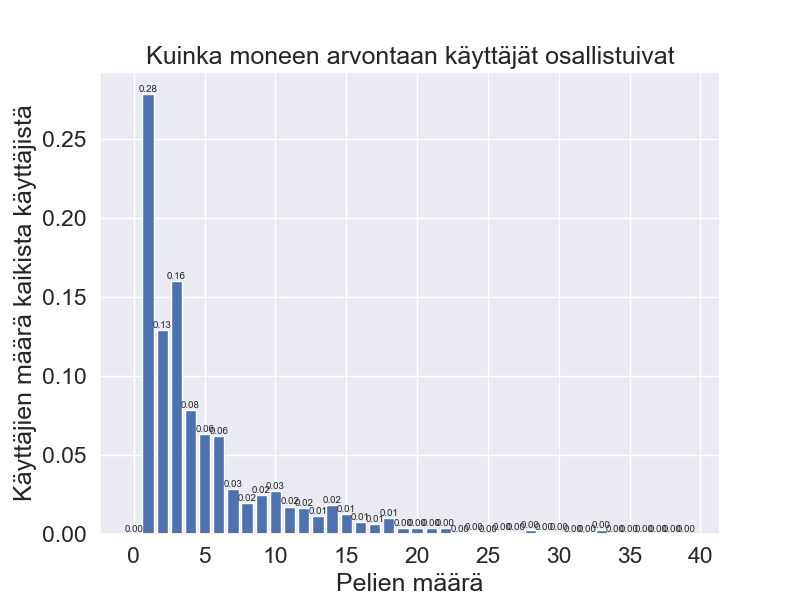

In [148]:
fig, ax = plt.subplots(figsize=(8,6))
counts, bins = np.histogram(num_signedGames_all, bins=np.linspace(0,40,41))
#counts, bins, bars = ax.hist(num_signedGames_all/num_signedGames_all.shape[0], bins=np.linspace(1,40,40), linewidth=1, edgecolor='k')
bar = ax.bar(bins[:-1], counts/users_atleast_one_signedGame.shape[0])

for b,c in zip(bar, counts/num_signedGames_all.shape[0]):
    height = b.get_height()
    ax.text(b.get_x() + b.get_width() / 2.0, height, f'{c:.2f}', ha='center', va='bottom', fontsize=7)
ax.set_xlabel('Pelien määrä')
ax.set_ylabel('Käyttäjien määrä kaikista käyttäjistä')
ax.set_title('Kuinka moneen arvontaan käyttäjät osallistuivat')

In [62]:
print(f'Keskimäärin käyttäjät yrittivät päästä {np.round(np.mean(num_signedGames_all),1)} peliin')

Keskimäärin käyttäjät yrittivät päästä 4.9 peliin


In [63]:
print(f'Pelimäärän mediaani on {np.round(np.median(num_signedGames_all),1)} peliä')

Pelimäärän mediaani on 3.0 peliä


## Mikä on todennäköisyys päästä ainakin yhteen peliin arvontavaiheessa valittujen pelien funktiona

In [64]:
signedGames_total = np.linspace(1,20,20)
chance_no_game = np.zeros((signedGames_total.shape))
for i,n in enumerate(signedGames_total):
    chance_no_game[i] = len(num_signedGames[num_signedGames==n])/len(num_signedGames_all[num_signedGames_all==n])

chance_no_game

array([0.47321429, 0.41346154, 0.27906977, 0.33333333, 0.19607843,
       0.08      , 0.13043478, 0.0625    , 0.1       , 0.13636364,
       0.07142857, 0.07692308, 0.11111111, 0.2       , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

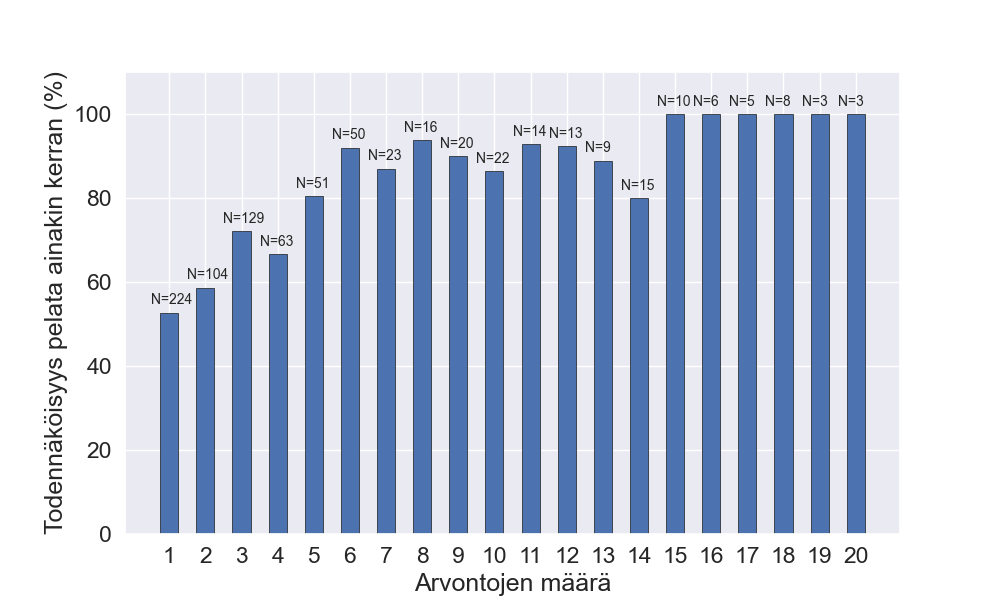

In [65]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(signedGames_total, (1-chance_no_game)*100, width=0.5, linewidth=0.5, edgecolor='k')
ax.set_xlabel('Arvontojen määrä')
ax.set_ylabel('Todennäköisyys pelata ainakin kerran (%)')
ax.set_xticks(np.linspace(1,20,20))
ax.set_ylim([0, 110])
for i,n in enumerate(signedGames_total):
    ax.text(n-0.5, (1-chance_no_game[i])*100 + 2, f'N={len(num_signedGames_all[num_signedGames_all==n])}', fontsize=10)

## Kuinka monta peliä käyttäjät pelasivat

In [66]:
signups_ttrpg.head()

,username,priority,time,message,game.gameId,count,createdAt,updatedAt,datetime
5,400720,0,2023-07-28T13:00:00Z,,p6114,5,2023-07-27T17:45:57.684Z,2023-07-30T08:00:53.285Z,2023-07-28 15:00:00
6,405213,0,2023-07-28T13:00:00Z,,p6114,5,2023-07-27T17:45:57.684Z,2023-07-30T08:00:53.285Z,2023-07-28 15:00:00
7,901388,0,2023-07-28T13:00:00Z,,p6114,5,2023-07-27T17:45:57.684Z,2023-07-30T08:00:53.285Z,2023-07-28 15:00:00
8,913796,0,2023-07-28T13:00:00Z,,p6114,5,2023-07-27T17:45:57.684Z,2023-07-30T08:00:53.285Z,2023-07-28 15:00:00
9,155349,0,2023-07-28T13:00:00Z,,p6114,5,2023-07-27T17:45:57.684Z,2023-07-30T08:00:53.285Z,2023-07-28 15:00:00


In [67]:
users_signup_ttrpg = signups_ttrpg.username.unique()

In [68]:
num_enteredGames = signups_ttrpg.groupby(by='username').count().loc[:, 'game.gameId']

Text(0.5, 1.0, 'Kuinka monta pöytäroolipeliä käyttäjät pelasivat')

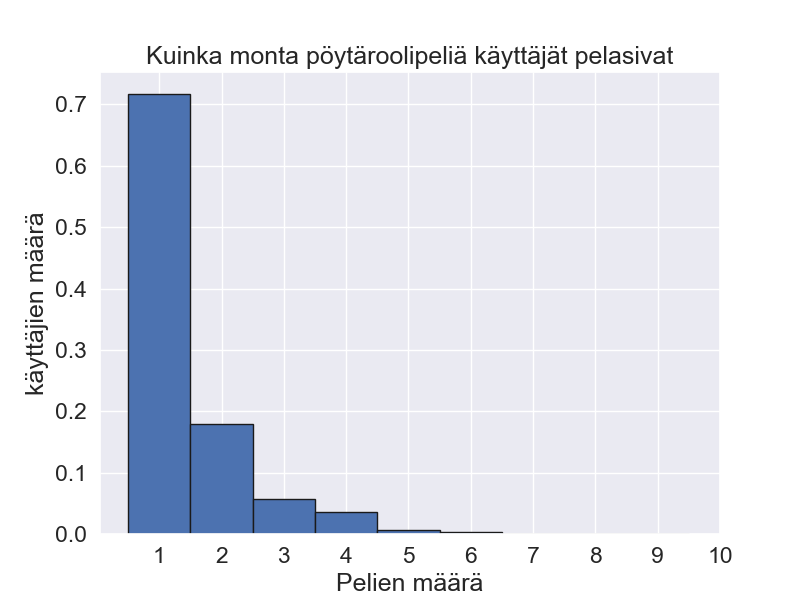

In [150]:
fig, ax = plt.subplots(figsize=(8,6))

counts, bins, bars = ax.hist(num_enteredGames, bins = np.linspace(1,10,10), linewidth=1, edgecolor='k', density=True)
ax.set_xticks(np.linspace(1,10,10)+0.5)
ax.set_xticklabels(np.linspace(1,10,10, dtype=int))
ax.set_xlabel('Pelien määrä')
ax.set_ylabel('käyttäjien määrä')
ax.set_title('Kuinka monta pöytäroolipeliä käyttäjät pelasivat')

In [70]:
num_enteredGames[num_enteredGames==1].shape[0]/num_enteredGames.shape[0]

0.717008797653959

In [71]:
print(f'Kesikimäärin käyttäjät pelasivat {np.round(np.mean(num_enteredGames),1)} peliä')
print(f'Pelattujen pelien mediaani {np.round(np.median(num_enteredGames),1)} peliä per käyttäjä')
max_games = int(np.max(num_enteredGames))
print(f'Suurimmillaan {int(counts[bins[:-1] == max_games][0])} käyttäjää pelasi {max_games} peliä')

Kesikimäärin käyttäjät pelasivat 1.4 peliä
Pelattujen pelien mediaani 1.0 peliä per käyttäjä
Suurimmillaan 2 käyttäjää pelasi 6 peliä


### Katsotaan kuinka moneen arvontaan nämä kolme käyttäjää, jotka pelasivat kuusi peliä osallistuivat

In [72]:
ind_max = np.where(np.array(num_enteredGames)==6)
users_signup_ttrpg[ind_max]

array(['804543', '711614'], dtype=object)

In [73]:
num_signedGames_all = signedGames_ttrpg.groupby(by='username').count().loc[:, 'gameDetails.gameId']

In [74]:
lucky_users = num_enteredGames[num_enteredGames == num_enteredGames.max()].index.to_list()

In [75]:
[i[1] for i in num_signedGames_all.iteritems() if i[0] in lucky_users]

/var/folders/sz/kw04phb16pbdzb3mhpdgqkq00000gn/T/ipykernel_2332/3585391295.py:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  [i[1] for i in num_signedGames_all.iteritems() if i[0] in lucky_users]


[10, 16]

### Katsotaan mikä on täyttöprosentti pelaajilla, jotka pelasivat 2 peliä tai enemmän

In [76]:
def mean_signedGames_lucky_users(num_signups):
    lucky_users = num_enteredGames[num_enteredGames >= num_signups].index.to_list()
    num_signedGames_lucky_users = np.array([i[1] for i in num_signedGames_all.iteritems() if i[0] in lucky_users])

    return (num_signedGames_lucky_users.mean(), num_signedGames_lucky_users.std())

In [77]:
num_signups = np.linspace(1,6,6, dtype=np.int32)

for s in num_signups:
    m,std = mean_signedGames_lucky_users(s)
    print(f'Keskimäärin pelaajat jotka pääsivät {s} peliin ilmoittautuivat {np.round(m,1)} +/- {np.round(std,1)} arvontaan')

Keskimäärin pelaajat jotka pääsivät 1 peliin ilmoittautuivat 5.9 +/- 5.8 arvontaan
Keskimäärin pelaajat jotka pääsivät 2 peliin ilmoittautuivat 10.2 +/- 6.3 arvontaan
Keskimäärin pelaajat jotka pääsivät 3 peliin ilmoittautuivat 12.5 +/- 6.3 arvontaan
Keskimäärin pelaajat jotka pääsivät 4 peliin ilmoittautuivat 14.8 +/- 6.5 arvontaan
Keskimäärin pelaajat jotka pääsivät 5 peliin ilmoittautuivat 18.6 +/- 7.7 arvontaan
Keskimäärin pelaajat jotka pääsivät 6 peliin ilmoittautuivat 13.0 +/- 3.0 arvontaan


/var/folders/sz/kw04phb16pbdzb3mhpdgqkq00000gn/T/ipykernel_2332/2245422841.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  num_signedGames_lucky_users = np.array([i[1] for i in num_signedGames_all.iteritems() if i[0] in lucky_users])


In [78]:
signups_games = signups_ttrpg.groupby(by=['username', 'game.gameId']).count()

In [79]:
games_lucky_users = signups_games[signups_games.index.get_level_values(0).isin(lucky_users)]

In [80]:
games_lucky_users_signed_and_entered = list(games_lucky_users.index.get_level_values(1).unique())

In [81]:
signedGames_gameCounts_lucky_users = signedGames_gameCounts[signedGames_gameCounts.index.get_level_values(0).isin(games_lucky_users_signed_and_entered)]

In [82]:
signedGames_gameCounts_lucky_users.loc[:, 'fillPercent'].median()

3.7

In [83]:
fillPercents_lucky_users = signedGames_gameCounts_lucky_users.loc[:, 'fillPercent'].to_numpy()

In [84]:
stats.ks_2samp(fillPercents, fillPercents_lucky_users, alternative='two-sided')

KstestResult(statistic=0.2801169590643275, pvalue=0.3733853613306782, statistic_location=5.2, statistic_sign=-1)

In [85]:
fillPercents_lucky_users.shape

(10,)

In [86]:
fillPercents.shape

(171,)

## Kuinka moneen arvontaan osallistuttiin jokaisessa alkamisajassa

In [87]:
start_times = signedGames_ttrpg.datetime

In [88]:
num_signedGames_in_slot = signedGames_ttrpg.groupby(by='datetime').username.count()

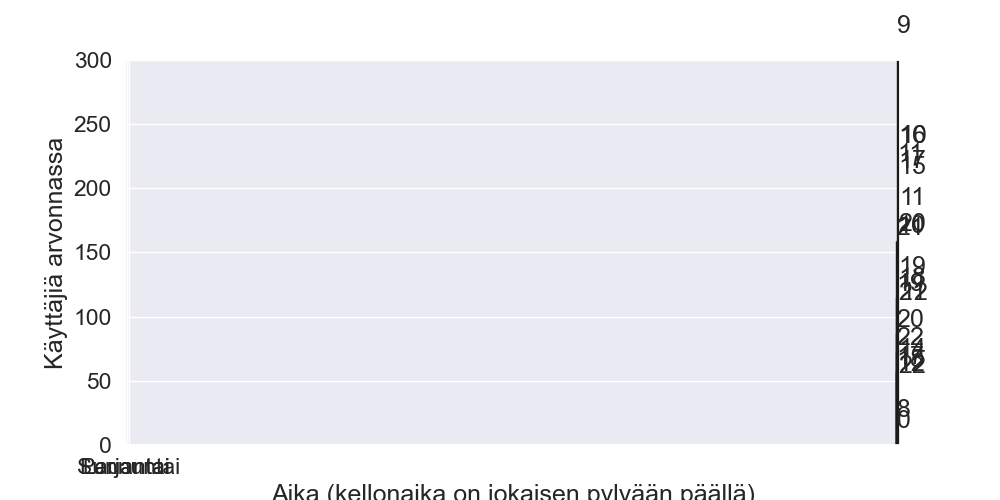

In [89]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(num_signedGames_in_slot.index, num_signedGames_in_slot, width=0.02, edgecolor='k', linewidth=1)

ax.set_ylabel('Käyttäjiä arvonnassa')
ax.set_xlabel('Aika (kellonaika on jokaisen pylvään päällä)')
ax.set_xticks([datetime(2022, 7, 29, 19, 0, 0), datetime(2022, 7, 30, 14, 0, 0), datetime(2022, 7, 31, 11, 0, 0)])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%A'))
ax.set_ylim([0, 300])

for i, n in enumerate(num_signedGames_in_slot):
    ax.text(num_signedGames_in_slot.index[i]-timedelta(minutes=25), n+5, str(num_signedGames_in_slot.index[i].hour))


## Kuinka monta pelaaja kussakin aloitusajassa

In [90]:
num_players_in_slot = signups_ttrpg.groupby(by='datetime').count().username

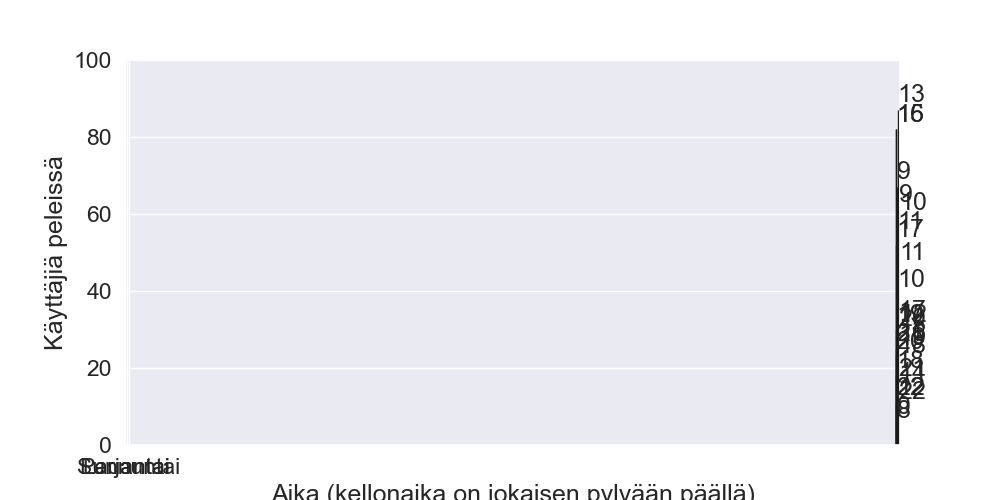

In [91]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(num_players_in_slot.index, num_players_in_slot, width=0.02, edgecolor='k', linewidth=1)

ax.set_ylabel('Käyttäjiä peleissä')
ax.set_xlabel('Aika (kellonaika on jokaisen pylvään päällä)')
ax.set_xticks([datetime(2022, 7, 29, 19, 0, 0), datetime(2022, 7, 30, 15, 0, 0), datetime(2022, 7, 31, 11, 0, 0)])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%A'))
ax.set_ylim([0, 100])

for i, n in enumerate(num_players_in_slot):
    ax.text(num_players_in_slot.index[i]-timedelta(minutes=25), n+2, str(num_players_in_slot.index[i].hour))


## Kuinka täynnä jokainen aloitusaika oli

In [92]:
maxPlayers = games_ttrpg.groupby(by='datetime').sum().maxAttendance

/var/folders/sz/kw04phb16pbdzb3mhpdgqkq00000gn/T/ipykernel_2332/2780126766.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  maxPlayers = games_ttrpg.groupby(by='datetime').sum().maxAttendance


In [93]:
maxPlayers.sum()

1129

In [94]:
xvalues = num_players_in_slot.index
increment = [i*6 for i in range(xvalues.shape[0])]
xvalues = [i + timedelta(hours=j) for i,j in zip(xvalues,increment)]

In [95]:
time_ticks = pd.date_range(xvalues[0], xvalues[-1], freq='12H')

In [96]:
num_players_in_draw = signedGames_ttrpg.groupby(by='datetime').username.unique().apply(lambda x: len(x))

Text(2023-08-05 09:00:00, 220, 'sunnuntai')

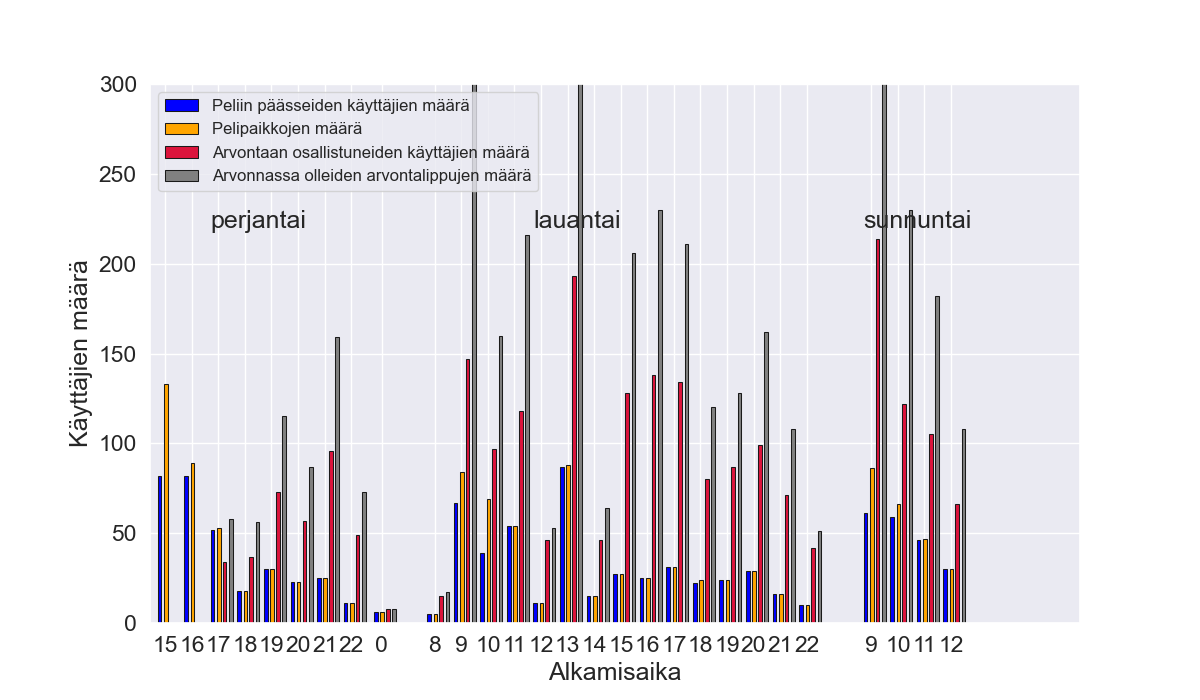

In [152]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.bar([i+timedelta(minutes=30) for i in xvalues], num_players_in_slot, width=0.04, edgecolor='k', linewidth=0.75, color='blue', label='Peliin päässeiden käyttäjien määrä')
ax.bar([i+timedelta(minutes=2*50+30) for i in xvalues], maxPlayers, width=0.04, edgecolor='k', linewidth=0.75, color='orange', label='Pelipaikkojen määrä')
ax.bar([i+timedelta(minutes=4*50+20) for i in xvalues[2:]], num_players_in_draw, width=0.04, edgecolor='k', linewidth=0.75, color='crimson', label='Arvontaan osallistuneiden käyttäjien määrä')
ax.bar([i+timedelta(minutes=6*50+20) for i in xvalues[2:]], num_signedGames_in_slot, width=0.04, edgecolor='k', linewidth=0.75, color='gray', label='Arvonnassa olleiden arvontalippujen määrä')


ax.set_ylabel('Käyttäjien määrä')
ax.set_xlabel('Alkamisaika')
ax.set_xticks([i+timedelta(minutes=120) for i in xvalues])
ax.set_xticklabels([i.hour for i in num_players_in_slot.index])
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
ax.set_ylim([0, 300])
ax.set_xlim([datetime(2023,7,28,13,0,0), datetime(2023,8,7,18)])
ax.legend(loc='upper left', fontsize=12)
ax.text(xvalues[2], 220, 'perjantai')
ax.text(xvalues[int(len(xvalues)/2)-1], 220, 'lauantai')
ax.text(xvalues[-4], 220, 'sunnuntai')

## Kuinka monta pelaajaa / maksimi kussakin aloitusajassa

In [98]:
games_in_slot_sum = games_ttrpg.groupby(by='datetime').sum()

/var/folders/sz/kw04phb16pbdzb3mhpdgqkq00000gn/T/ipykernel_2332/850624353.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  games_in_slot_sum = games_ttrpg.groupby(by='datetime').sum()


Text(2023-07-30 09:00:00, 101, 'sunnuntai')

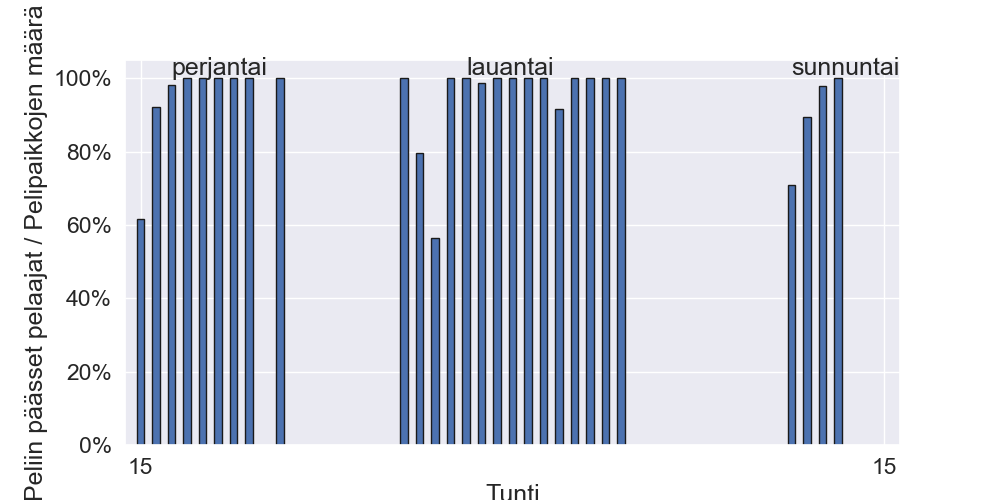

In [154]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(num_players_in_slot.index, num_players_in_slot/games_in_slot_sum['maxAttendance']*100, width=0.02, edgecolor='k', linewidth=1)

ax.plot((datetime(2022,7,29,14), datetime(2022,7,31,15)), (100, 100), color='k', linestyle='--', linewidth=2)
ax.set_ylabel('Peliin päässet pelaajat / Pelipaikkojen määrä')
ax.set_xlabel('Tunti')
ax.set_xticks(time_ticks[time_ticks.hour >= 9][::2])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
ax.set_ylim([0, 105])
ax.set_xlim([datetime(2023,7,28,14,0,0), datetime(2023,7,30,16)])
ax.set_yticks(np.linspace(0,100,6))
ax.set_yticklabels([f'{int(n)}%' for n in ax.get_yticks()])
ax.text(datetime(2023,7,28,17,00), 101, 'perjantai')
ax.text(datetime(2023,7,29,12,00), 101, 'lauantai')
ax.text(datetime(2023,7,30,9,00), 101, 'sunnuntai')

## Kuinka monta pelia alkoi

In [100]:
signups_ttrpg.columns

Index(['username', 'priority', 'time', 'message', 'game.gameId', 'count',
       'createdAt', 'updatedAt', 'datetime'],
      dtype='object')

In [101]:
players_in_game = signups_ttrpg.groupby(by='game.gameId').count().username

In [102]:
games_by_id = games_ttrpg.set_index(games_ttrpg.gameId)

In [103]:
games_not_started = set(games_by_id.index).difference(set(players_in_game.index))
list(games_not_started)

['p7032',
 'p7029',
 'p6471',
 'p7030',
 'p7031',
 'p7023',
 'p6512',
 'p7024',
 'p6354']

In [104]:
games_ttrpg.columns

Index(['gameId', 'accessibilityValues', 'contentWarnings', 'createdAt',
       'description', 'endTime', 'entryFee', 'gameSystem', 'genres',
       'language', 'location', 'maxAttendance', 'minAttendance', 'mins',
       'otherAccessibilityInformation', 'otherAuthor', 'people', 'popularity',
       'programType', 'revolvingDoor', 'shortDescription', 'signupType',
       'startTime', 'styles', 'tags', 'title', 'updatedAt', 'datetime'],
      dtype='object')

In [105]:
print(f'{len(set(games_by_id.index).difference(set(players_in_game.index)))} peliä {games_by_id.shape[0]} pelistä ei alkanut ({np.round(len(set(games_by_id.index).difference(set(players_in_game.index)))/games_by_id.shape[0]*100,1)}%)')

9 peliä 209 pelistä ei alkanut (4.3%)


In [106]:
minAttendance = []
maxAttendance = []
fillPerc = []
dt = []
for i,g in enumerate(players_in_game):
    minAttendance.append(games_by_id[games_by_id.index == players_in_game.index[i]].minAttendance.to_numpy()[0])
    maxAttendance.append(games_by_id[games_by_id.index == players_in_game.index[i]].maxAttendance.to_numpy()[0])
    fillPerc.append(g/games_by_id[games_by_id.index == players_in_game.index[i]].maxAttendance.to_numpy()[0])
    dt.append(games_by_id[games_by_id.index == players_in_game.index[i]].datetime.to_numpy()[0])

In [107]:
players_in_game_data = pd.DataFrame(data={'game': players_in_game.index, 'players': players_in_game.to_numpy(), 'maxPlayers': maxAttendance,
'minPlayers': minAttendance, 'fillPercent': fillPerc, 'datetime': dt})

In [108]:
print(f'Pelien keskimääräinen täyttöaste on {np.round(players_in_game_data.fillPercent.mean()*100,1)}% (mediaani: {np.round(players_in_game_data.fillPercent.median()*100,1)}%)')

Pelien keskimääräinen täyttöaste on 96.5% (mediaani: 100.0%)


In [109]:
num_max = players_in_game_data[players_in_game_data.players == players_in_game_data.maxPlayers].shape[0]
num_all_games = players_in_game_data.shape[0]
print(f'{num_max} peliä alkoi maksimipelaajamäärällä ({np.round(num_max/num_all_games*100,1)})%')

180 peliä alkoi maksimipelaajamäärällä (90.0)%


In [110]:
num_min = players_in_game_data[players_in_game_data.players == players_in_game_data.minPlayers].shape[0]
num_all_games = players_in_game_data.shape[0]
print(f'{num_min} peliä alkoi minimipelaajamäärällä ({np.round(num_min/num_all_games*100,1)})%')

7 peliä alkoi minimipelaajamäärällä (3.5)%


In [111]:
players_in_game_data_by_datetime = players_in_game_data.groupby(by='datetime').mean()

/var/folders/sz/kw04phb16pbdzb3mhpdgqkq00000gn/T/ipykernel_2332/2224658531.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  players_in_game_data_by_datetime = players_in_game_data.groupby(by='datetime').mean()


Text(2023-07-30 09:00:00, 101, 'sunnuntai')

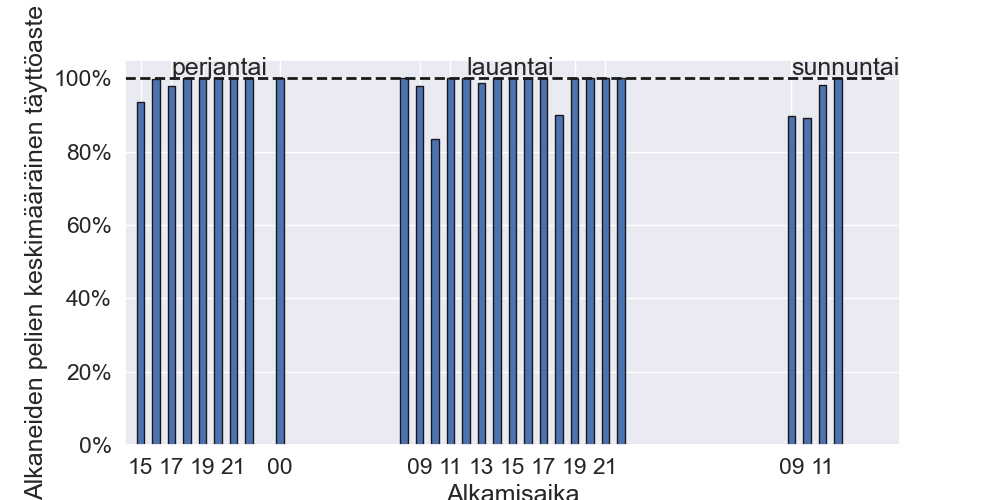

In [155]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(players_in_game_data_by_datetime.index, players_in_game_data_by_datetime.fillPercent*100, width=0.02, edgecolor='k', linewidth=1)

ax.plot((datetime(2023,7,28,14), datetime(2023,7,30,15)), (100, 100), color='k', linestyle='--', linewidth=2)
ax.set_ylabel('Alkaneiden pelien keskimääräinen täyttöaste')
ax.set_xlabel('Alkamisaika')
ax.set_xticks(players_in_game_data_by_datetime.index.to_list()[::2])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
ax.set_ylim([0, 105])
ax.set_xlim([datetime(2023,7,28,14,0,0), datetime(2023,7,30,16)])
ax.set_yticks(np.linspace(0,100,6))
ax.set_yticklabels([f'{int(n)}%' for n in ax.get_yticks()])
ax.text(datetime(2023,7,28,17,00), 101, 'perjantai')
ax.text(datetime(2023,7,29,12,00), 101, 'lauantai')
ax.text(datetime(2023,7,30,9,00), 101, 'sunnuntai')